In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pathlib
savefig_args = {"dpi": 600, "bbox_inches": "tight", "pad_inches": 0, "transparent": False}
mpl.rc('savefig', dpi=600)
output_dir='../../figures/figure4'
pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)
output_suffix = ""
output_formats = [".png", '.svg', '.eps']

def save_figure(fig, name, output_dir=output_dir, output_suffix=output_suffix, output_formats=output_formats, savefig_args=savefig_args):
    for output_format in output_formats:
        fig.savefig(output_dir + "/" + name + output_suffix + output_format, **savefig_args)
    return None
import pandas as pd
import numpy as np
import scanpy as sc
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pathlib
import scirpy as ir
from statsmodels.stats.multitest import multipletests
def correct_p(df, column, method):
    result = multipletests(df[column], method = method)
    df['significant'] = result[0]
    df[column + 'corrected_pvalue'] = result[1]
    return df
plt.style.use('../../scripts/paper_umap.mplstyle')
%run ../../scripts/plotting_helper.py

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 20) 
pd.set_option('display.width', 100)

In [2]:
# shuffled
#df = pd.read_csv('../seqclone/outputs/seqclone_with_effect_size_bcells_well_shuffled/clone_id_var_df.csv', index_col=0)

In [3]:
in_vitro = '../../../code/outputs/seqclone_with_effect_size_bcells/clone_id_var_df.csv'
in_vivo = '../../../code/outputs/seqclone_with_effect_size_bcells_lane_invivo/clone_id_var_df.csv'

In [4]:
# all clones
in_vitro = '../../code/outputs/seqclone_with_effect_size_bcells/clone_id_var_df.csv'

df = pd.read_csv(in_vitro, index_col=0)
df = _prepare_seqclone_df(df)
x = 'frequentist_p_value_corrected'
y = 'normalized_absolute_effect_size'
effect_cutoff = 0.2
pvalue_threshold = 0.01
# specify genes to label
genes_to_label = ['IGKV7-3', 'IGKC', 'IGHA1',  'JCHAIN', "AICDA",'FTX', "IGHE"]
# place labels manually
xplacement = [ 0.5, 0.1, 0.1, 0.02, 0.02, 0.0005, 0.8]
yplacement = [1, 0.5, 0.01, 0.001, 0.0002, 0.001,0.00005]
g = plot_volcano(df, pvalue_threshold=pvalue_threshold,
                 effect_cutoff=effect_cutoff, 
                 genes_to_label=genes_to_label,
                 x=x, y=y, xplacement=xplacement, 
                 yplacement=yplacement)

FileNotFoundError: [Errno 2] No such file or directory: '../../code/outputs/seqclone_with_effect_size_bcells/clone_id_var_df.csv'

In [5]:
df[df.pvalue < 0.01].sort_values('effect_size')

,nulls,pvalue,effect_size,gene_ids,feature_types,n_counts,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,...,clonally_expressed,normalized_effect_size,frequentist_p_value,significant,frequentist_p_value_corrected,absolute_effect_size,normalized_absolute_effect_size,known clonal gene,significant-IgVariable,legend
IGKC,0,0.000000,-1.023619,ENSG00000211592,Gene Expression,2068111.0,False,4303,2.262299,1.182432,...,True,-0.452468,0.0001,True,0.000278,1.023619,0.865689,False,True-False,p < 0.01
IGHV3-23,0,0.000000,-0.886539,ENSG00000211949,Gene Expression,1236558.0,False,1976,1.002064,0.694179,...,True,-0.884713,0.0001,True,0.000278,0.886539,1.277105,True,True-True,Known Clonal & p < 0.01
IGKV3-20,0,0.000000,-0.816742,ENSG00000239951,Gene Expression,3514267.0,False,2036,0.994094,0.690190,...,True,-0.821595,0.0001,True,0.000278,0.816742,1.183359,True,True-True,Known Clonal & p < 0.01
IGLC2,0,0.000000,-0.701300,ENSG00000211677,Gene Expression,431471.0,False,3095,1.209003,0.792541,...,True,-0.580065,0.0001,True,0.000278,0.701300,0.884875,False,True-False,p < 0.01
IGKV4-1,0,0.000000,-0.638363,ENSG00000211598,Gene Expression,2804586.0,False,2261,0.869306,0.625567,...,True,-0.734336,0.0001,True,0.000278,0.638363,1.020455,True,True-True,Known Clonal & p < 0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HIST2H3PS2,115,0.002864,-0.000740,ENSG00000273213,Gene Expression,315.0,False,47,0.005636,0.005620,...,True,-0.131245,0.0116,False,0.021194,0.000740,0.131615,False,False-False,p > 0.01
AGAP2-AS1,107,0.004931,-0.000725,ENSG00000255737,Gene Expression,233.0,False,51,0.006310,0.006290,...,True,-0.114935,0.0108,False,0.019867,0.000725,0.115297,False,False-False,p > 0.01
SLC22A15,150,0.006129,-0.000686,ENSG00000163393,Gene Expression,321.0,False,50,0.005850,0.005833,...,True,-0.117295,0.0151,False,0.026884,0.000686,0.117638,False,False-False,p > 0.01
WWTR1-AS1,166,0.006287,-0.000642,ENSG00000241313,Gene Expression,103.0,False,47,0.005499,0.005484,...,True,-0.116823,0.0167,False,0.029477,0.000642,0.117144,False,False-False,p > 0.01


In [6]:
g.fig.set_figheight(4.8)
g.fig.set_figwidth(4.8)
save_figure(g.fig, "all_volcano_CCGs")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


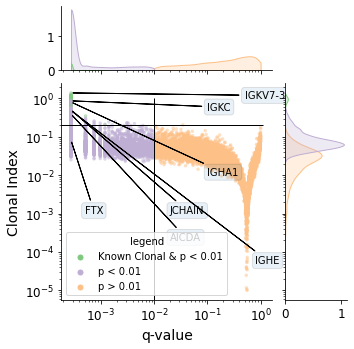

In [7]:
g.fig

In [8]:
(df['frequentist_p_value_corrected'] < pvalue_threshold).value_counts()

True     6937
False    6797
Name: frequentist_p_value_corrected, dtype: int64

In [9]:
save_figure(g.fig, "all_volcano_CCGs")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


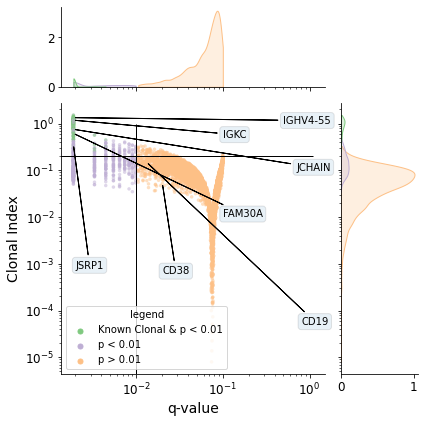

In [10]:
# in vivo
# in vivo
df = pd.read_csv(in_vivo, index_col=0)

df = _prepare_seqclone_df(df)
x = 'frequentist_p_value_corrected'
y = 'normalized_absolute_effect_size'
effect_cutoff = 0.2
pvalue_threshold = 0.01
genes_to_label = ['IGHV4-55', 'IGKC', 'FAM30A',  'JCHAIN', "CD38",'JSRP1', "CD19"]
xplacement = [ 0.5, 0.1, 0.1, 0.7, 0.02, 0.002, 0.8]
yplacement = [1, 0.5, 0.01, 0.1, 0.0006, 0.0008,0.00005]
g = plot_volcano(df, pvalue_threshold=pvalue_threshold,
                 effect_cutoff=effect_cutoff, 
                 genes_to_label=genes_to_label,
                 x=x, y=y, xplacement=xplacement, 
                 yplacement=yplacement)


In [11]:
g.fig.set_figheight(5)
g.fig.set_figwidth(5)

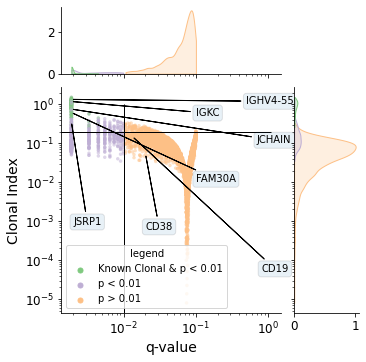

In [12]:
g.fig

In [13]:
save_figure(g.fig, "in_vivo_volcano_CCGs")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [14]:
(df['frequentist_p_value_corrected'] < pvalue_threshold).value_counts()

False    8064
True      806
Name: frequentist_p_value_corrected, dtype: int64

In [15]:
most_sig_genes = df[(df.frequentist_p_value_corrected < pvalue_threshold) & (df.normalized_absolute_effect_size >= effect_cutoff)].sort_values('normalized_effect_size')

In [16]:
most_sig_genes['known clonal gene'].value_counts()

False    168
True     159
Name: known clonal gene, dtype: int64

In [17]:
most_sig_genes

,nulls,pvalue,effect_size,gene_ids,feature_types,n_counts,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,...,clonally_expressed,normalized_effect_size,frequentist_p_value,significant,frequentist_p_value_corrected,absolute_effect_size,normalized_absolute_effect_size,known clonal gene,significant-IgVariable,legend
IGHV2OR16-5,0,1.317762e-46,-0.068345,ENSG00000259303,Gene Expression,444.0,False,13,0.049027,0.047864,...,True,-1.394007,0.0001,True,0.001899,0.068345,1.427907,True,True-True,Known Clonal & p < 0.01
IGHV4-55,0,1.758004e-72,-0.481073,ENSG00000254395,Gene Expression,18662.0,False,98,0.432892,0.359695,...,True,-1.111300,0.0001,True,0.001899,0.481073,1.337447,True,True-True,Known Clonal & p < 0.01
IGHV3-47,0,6.266586e-22,-0.039023,ENSG00000229092,Gene Expression,134.0,False,11,0.035630,0.035010,...,True,-1.095240,0.0001,True,0.001899,0.039023,1.114638,True,True-True,Known Clonal & p < 0.01
IGKV2D-28,0,1.890760e-79,-0.718966,ENSG00000242534,Gene Expression,42112.0,False,141,0.660030,0.506835,...,True,-1.089293,0.0001,True,0.001899,0.718966,1.418538,True,True-True,Known Clonal & p < 0.01
IGHV1OR15-1,0,1.229341e-21,-0.040651,ENSG00000270505,Gene Expression,204.0,False,12,0.037814,0.037117,...,True,-1.075012,0.0001,True,0.001899,0.040651,1.095212,True,True-True,Known Clonal & p < 0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DUSP1,0,7.316201e-09,-0.188364,ENSG00000120129,Gene Expression,19558.0,False,562,1.508570,0.919713,...,True,-0.124863,0.0001,True,0.001899,0.188364,0.204808,False,True-False,p < 0.01
KRTCAP2,0,1.043269e-44,-0.357758,ENSG00000163463,Gene Expression,54728.0,False,787,3.041470,1.396609,...,True,-0.117627,0.0001,True,0.001899,0.357758,0.256162,False,True-False,p < 0.01
JUN,0,7.166927e-11,-0.276604,ENSG00000177606,Gene Expression,56102.0,False,652,2.415514,1.228328,...,True,-0.114511,0.0001,True,0.001899,0.276604,0.225187,False,True-False,p < 0.01
DERL3,0,8.958163e-37,-0.354791,ENSG00000099958,Gene Expression,83083.0,False,793,3.502782,1.504695,...,True,-0.101288,0.0001,True,0.001899,0.354791,0.235789,False,True-False,p < 0.01


In [18]:
for i in most_sig_genes[(~most_sig_genes.index.str.contains('IGK|IGL|IGHV')) & 
                        (most_sig_genes.n_cells > 20)].sort_values('normalized_absolute_effect_size').index:
    print(i)

RASD1
IQCB1
CASC4
PPBP
LSR
MYL9
GNG11
SLC27A5
DUSP1
MZB1
HAUS4
PF4
TNFRSF4
MFF
BUD23
TRMT1
BNIP2
TRPV2
PRRC2A
HIST1H1D
POLD2
CLU
TLE1
F13A1
VPS26A
LAS1L
GGH
JUN
LMF1
SQLE
ZDHHC16
SRCAP
MAPKAPK5-AS1
DAPK1
PHGDH
ALG12
MDK
HLA-DMA
DERL3
ATF5
LINC02541
CRIP1
COPB2
PHYH
AL109761.1
MAP3K6
SLC22A18
ELP6
NAA80
FOS
B4GALT1
METTL3
JMY
FBP1
DICER1
SLC7A5
NSUN2
NAGLU
FLNB
HLA-DRB1
CXCR3
KRTCAP2
LINC00944
NTHL1
NUAK2
TBC1D7
IFI27L1
DDX52
FCER1G
PLXNB2
BOD1
NIPSNAP2
GATB
ITGB2
OXCT1
DNAJC3-DT
ALOX5AP
RGS2
ENTPD3-AS1
LRTOMT
AP3M1
CHD6
AL080276.2
PACSIN2
KLHL7
USP28
RAB27B
ACYP1
IER3-AS1
N4BP2L1
KLF6
IQCG
DOT1L
MTF1
TRPM4
EGFL7
ZNF487
TNNC2
FAH
EIF2D
ATAD3C
DXO
IFI30
CTSW
ZNF44
LRRC58
PITPNA
CA2
RAB35
S100A4
POLG2
EHD3
RSPH3
PLAAT2
PLA2G2D
CKMT2-AS1
LACTB2-AS1
ZNF490
ARL5B
CLYBL
FTO
JSRP1
TCP11L2
METTL1
CST3
KRTCAP3
ARFGAP1
TRAK2
NOCT
TMEM62
DHX33
TIMP1
GPR183
ABLIM1
LINC00426
MRTFB
SEPTIN4
MCAM
CLDN3
AK9
DPEP3
HCST
FAM153CP
MIER2
UCHL1
VPREB3
GTSF1
MARK2
PRSS21
TLR10
ZNF213-AS1
FAM30A
IGHM
JCHAIN
TYR

In [19]:
# load data
in_vitro = pd.read_csv(in_vitro, index_col=0)
#in_vitro = pd.read_csv('../seqclone/outputs/seqclone_allcells/clone_id_tests.csv', index_col=0)
#shuffled_stats_df = pd.read_csv('../seqclone/outputs/seqclone_shuffled/clone_id_tests.csv', index_col=0)
in_vivo = pd.read_csv(in_vivo, index_col=0)

# 10^4 random shuffles
in_vivo['freq_pvalue'] = in_vivo.freq_pvalue / 10**4
in_vivo = correct_p(in_vivo, 'freq_pvalue', 'bonferroni')
in_vivo = correct_p(in_vivo, 'pvalue', 'fdr_bh')

clonal_in_vivo = in_vivo[in_vivo.significant == True]

clonal_in_vivo[~clonal_in_vivo.index.str.contains('IGH|IGK|IGL')].shape

(629, 19)

In [20]:
df = df.sort_values('normalized_effect_size')

In [21]:
df = df[df.n_cells_by_counts > 5]

In [22]:
df.loc[:,'ig_variable'] = df.index.str.contains('IGLV|IGKV|IGHV')
df.loc[:,'ac'] = df.index.str.contains('AC2|AC1')

In [23]:
df = df[~df.ig_variable]
df = df[~df.ac]

In [24]:
df[df.n_cells_by_counts > 100]

,nulls,pvalue,effect_size,gene_ids,feature_types,n_counts,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,...,frequentist_p_value,significant,frequentist_p_value_corrected,absolute_effect_size,normalized_absolute_effect_size,known clonal gene,significant-IgVariable,legend,ig_variable,ac
IGHD,0,1.329778e-80,-1.091162,ENSG00000211898,Gene Expression,91699.0,False,218,1.068554,0.726850,...,0.0001,True,0.001899,1.091162,1.501220,False,True-False,p < 0.01,False,False
IGHG4,0,8.190994e-72,-0.758695,ENSG00000211892,Gene Expression,21279.0,False,260,0.931678,0.658389,...,0.0001,True,0.001899,0.758695,1.152351,False,True-False,p < 0.01,False,False
IGLC3,0,1.553819e-92,-1.129785,ENSG00000211679,Gene Expression,132555.0,False,427,1.635875,0.969215,...,0.0001,True,0.001899,1.129785,1.165670,False,True-False,p < 0.01,False,False
IGHG2,0,1.897363e-90,-1.638507,ENSG00000211893,Gene Expression,223863.0,False,503,2.498504,1.252335,...,0.0001,True,0.001899,1.638507,1.308361,False,True-False,p < 0.01,False,False
IGLC2,0,2.132660e-96,-1.629352,ENSG00000211677,Gene Expression,295538.0,False,546,2.554323,1.268164,...,0.0001,True,0.001899,1.629352,1.284811,False,True-False,p < 0.01,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PFKL,980,9.744934e-01,0.018939,ENSG00000141959,Gene Expression,1093.0,False,121,0.167664,0.155006,...,0.0981,False,0.099094,0.018939,0.122184,False,False-False,p > 0.01,False,False
CDC123,989,9.842848e-01,0.016697,ENSG00000151465,Gene Expression,974.0,False,105,0.133478,0.125291,...,0.0990,False,0.099652,0.016697,0.133269,False,False-False,p > 0.01,False,False
FBXL15,986,9.830411e-01,0.017430,ENSG00000107872,Gene Expression,886.0,False,104,0.137800,0.129097,...,0.0987,False,0.099417,0.017430,0.135012,False,False-False,p > 0.01,False,False
SH3BGRL,992,9.935202e-01,0.031313,ENSG00000131171,Gene Expression,1638.0,False,183,0.246013,0.219948,...,0.0993,False,0.099716,0.031313,0.142363,False,False-False,p > 0.01,False,False


In [25]:
import upsetplot

ModuleNotFoundError: No module named 'upsetplot'

In [ ]:
in_vivo['in vivo'] = True
in_vitro['in vivo'] = False
data = pd.concat([in_vivo.reset_index(), in_vitro.reset_index()])

In [ ]:
data.rename({'index':'gene_name'}, axis=1, inplace=True)

In [ ]:
data = data.dropna(subset = 'pvalue')

In [ ]:
data['Variable Ig Gene'] = data.gene_name.str.contains('IGHV|IGKV|IGLV')

In [ ]:
data = data[data.clonally_expressed == True]

In [ ]:
counts = data.groupby(['clonally_expressed','Variable Ig Gene', 'highly_variable'])['in vivo'].value_counts()

In [ ]:
fig = plt.figure()
upsetplots = upsetplot.UpSet(counts, facecolor="#0F52BA").plot(fig=fig)
#upsetplots = upset.plot(fig=fig)
upsetplots['intersections'].set_yscale('log')
upsetplots['intersections'].set_ylim((0, 7000))

In [ ]:
save_figure(fig, "upset_plot_v2")

In [ ]:
noig = data[~data.gene_name.str.contains("IGH|IGK|IGL")]

In [ ]:
for gene in noig.gene_name:
    print(gene)